# Processing

In [1]:
import pandas as pd
import numpy as np

rppa_sheets = pd.read_excel('/workspaces/HOCMO/MDD_RPPA_Level3_preprocessed_2020-9.xlsx', sheet_name=None)
rppa_sheet = rppa_sheets['MDD_RPPA_Level3_annotated'].set_index('Protein')
rppa_sheet.columns = [c.split('_')[0]+'_'+c.split('_')[1] for c in rppa_sheet.columns]
rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]
rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]

rppa_averaged= rppa_averaged[['Ctrl_4', 'Ctrl_8', 'Ctrl_24', 'Ctrl_48', 
               'EGF_4', 'EGF_8', 'EGF_24', 'EGF_48',
               'HGF_4', 'HGF_8', 'HGF_24', 'HGF_48', 
               'OSM_4', 'OSM_8','OSM_24', 'OSM_48', 
               'BMP2_4','BMP2_8', 'BMP2_24', 'BMP2_48', 
               'IFNG_4', 'IFNG_8', 'IFNG_24','IFNG_48', 
               'TGFB_4', 'TGFB_8', 'TGFB_24', 'TGFB_48'
               ]]

time_conditions=['_4','_8','_24','_48']

for time_condition in time_conditions:
    time_m=rppa_averaged.columns.str.endswith(time_condition)
    conditions=rppa_averaged.columns[time_m&(~rppa_averaged.columns.str.contains('Ctrl'))].unique()
    print (conditions)
    for condition in conditions:
        rppa_averaged[condition] = rppa_averaged[condition]-rppa_averaged['Ctrl'+time_condition]
    rppa_averaged=rppa_averaged.drop('Ctrl'+time_condition,axis=1)
rppa_averaged = np.absolute(rppa_averaged)

Index(['EGF_4', 'HGF_4', 'OSM_4', 'BMP2_4', 'IFNG_4', 'TGFB_4'], dtype='object')
Index(['EGF_8', 'HGF_8', 'OSM_8', 'BMP2_8', 'IFNG_8', 'TGFB_8'], dtype='object')
Index(['EGF_24', 'HGF_24', 'OSM_24', 'BMP2_24', 'IFNG_24', 'TGFB_24'], dtype='object')
Index(['EGF_48', 'HGF_48', 'OSM_48', 'BMP2_48', 'IFNG_48', 'TGFB_48'], dtype='object')


In [2]:
gcp_sheet = pd.read_excel('/workspaces/HOCMO/LINCS_GCP_Plate72_annotated_minimized_2019-12-16_16-53-04_LVL3_preprocessed.xlsx', sheet_name='LINCS_GCP_Plate72')

gcp_sheet_T = gcp_sheet.set_index('histone').T
gcp_sheet_T.index.name = gcp_sheet_T.columns.name
gcp_sheet_T.columns.name = None
gcp_averaged = gcp_sheet_T.groupby(gcp_sheet_T.columns, axis=1, sort=False).mean()
time_conditions=['_4','_8','_24','_48']
for time_condition in time_conditions:
    time_m=gcp_averaged.columns.str.endswith(time_condition)
    conditions=gcp_averaged.columns[time_m&(~gcp_averaged.columns.str.contains('ctrl'))].unique()
    print (conditions)
    for condition in conditions:
        gcp_averaged[condition] = gcp_averaged[condition]-gcp_averaged['ctrl_0']
gcp_averaged = gcp_averaged.drop('ctrl_0',axis=1)

Index(['BMP2_4', 'EGF_4', 'HGF_4', 'IFNG_4', 'OSM_4', 'TGFB_4'], dtype='object')
Index(['BMP2_8', 'EGF_8', 'HGF_8', 'IFNG_8', 'OSM_8', 'TGFB_8'], dtype='object')
Index(['BMP2_24', 'EGF_24', 'HGF_24', 'IFNG_24', 'OSM_24', 'TGFB_24'], dtype='object')
Index(['BMP2_48', 'EGF_48', 'HGF_48', 'IFNG_48', 'OSM_48', 'TGFB_48'], dtype='object')


In [3]:
gcp_averaged

,BMP2_24,BMP2_4,BMP2_48,BMP2_8,EGF_24,EGF_4,EGF_48,EGF_8,HGF_24,HGF_4,...,IFNG_48,IFNG_8,OSM_24,OSM_4,OSM_48,OSM_8,TGFB_24,TGFB_4,TGFB_48,TGFB_8
histone,,,,,,,,,,,,,,,,,,,,,
H3K4me0,0.016037,-0.004981,-0.150201,-0.119874,-0.223106,0.005189,-0.004515,0.086678,-0.386092,-0.024316,...,-1.004543,-0.151702,-0.073122,-0.247830,-0.324082,0.093150,-0.735237,-0.034854,-0.088617,-0.270717
H3K4me1,0.133631,0.136179,-0.259853,0.166434,-0.281109,0.102462,-0.198556,0.111939,0.513560,0.074178,...,-1.066835,0.144085,0.067443,0.072173,-0.385470,0.055039,-0.635841,0.178204,-0.070589,-0.107032
H3K4me2,-0.253799,-0.067001,-0.416534,-0.145759,-0.273537,-0.142473,-0.036742,-0.280827,0.068638,-0.061779,...,-0.943835,-0.283051,-0.152042,-0.268635,-0.619284,-0.078837,-0.487300,-0.139286,-0.171972,-0.155654
H3K4me3,-0.107283,-0.121369,-0.315625,-0.119914,-0.264003,-0.042522,-0.119528,-0.100895,0.112030,-0.045712,...,-0.774611,-0.130558,-0.183327,-0.232601,-0.490395,-0.024618,-0.527218,-0.074478,0.013710,-0.248440
H3K4ac1,-0.311632,-0.282647,-0.404569,-0.262415,-0.433674,-0.390137,-0.031935,-0.216283,0.249552,-0.195519,...,-1.580937,-0.440059,-0.388057,-0.680333,-1.465886,-0.443533,-1.373849,-0.291892,-0.101541,-0.439114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H4(20to23)K20me0,1.517242,-0.315534,2.032227,-0.605362,2.223261,-0.132070,2.241896,0.094890,1.456932,-0.246551,...,1.880662,-0.143573,1.588361,0.367057,1.695639,0.341676,0.897532,-0.375851,1.897346,-0.080077
H4(20to23)K20me1,-0.080774,-0.342188,0.643239,-0.401636,0.482560,-0.312391,0.705756,-0.104046,-0.002902,0.086720,...,0.861242,-0.226521,0.154219,0.146322,0.600663,0.227780,-0.289277,-0.512397,0.315347,-0.025049
H4(20to23)K20me2,-0.106296,0.157193,0.175296,-0.058380,-0.033184,-0.074272,-0.429710,0.053620,0.028257,0.243721,...,-0.347001,-0.205082,-0.312479,-0.111711,0.050550,0.144921,-0.003563,-0.217663,-0.513190,0.186887


In [4]:
rppa_averaged

,EGF_4,EGF_8,EGF_24,EGF_48,HGF_4,HGF_8,HGF_24,HGF_48,OSM_4,OSM_8,...,BMP2_24,BMP2_48,IFNG_4,IFNG_8,IFNG_24,IFNG_48,TGFB_4,TGFB_8,TGFB_24,TGFB_48
Protein,,,,,,,,,,,,,,,,,,,,,
ABL1,0.049157,0.079951,0.030052,0.042217,0.071919,0.038183,0.083117,0.026330,0.050032,0.027077,...,0.023789,0.071314,0.033988,0.052358,0.047361,0.037396,0.050547,0.033159,0.031050,0.045654
ACACApS79,0.152832,0.136200,0.037562,0.193938,0.199244,0.157221,0.046797,0.233127,0.482309,0.074117,...,0.021280,0.128604,0.062324,0.171148,0.380278,0.713289,0.080166,0.024917,0.236249,0.122431
ACACA,0.300844,0.346848,0.111401,0.465326,0.378279,0.400327,0.393230,0.432240,0.541781,0.357302,...,0.687672,0.596771,0.812284,0.801005,0.589558,0.562646,0.855471,0.812629,0.423138,0.740998
ACTB,0.031806,0.089931,0.228721,0.414635,0.012234,0.073282,0.181127,0.431888,0.093043,0.209789,...,0.432777,0.670866,0.125165,0.281339,0.462946,0.185483,0.153416,0.406118,0.894917,1.027210
ADAR,0.062241,0.004090,0.198566,0.651324,0.015708,0.071103,0.163910,0.681838,0.054589,0.068093,...,0.138112,0.739005,0.020035,0.014355,0.105648,0.686257,0.055798,0.060584,0.176686,0.897050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.204034,0.320344,0.894787,2.033225,0.208621,0.287992,0.806132,1.492314,0.242032,0.228851,...,0.872471,1.793938,0.259903,0.318673,0.924933,1.767933,0.221857,0.332257,0.857116,1.814121
YBX1pS102,0.780322,0.750876,1.167023,1.002398,0.317199,0.331333,0.597449,0.330785,0.574641,0.440617,...,1.041454,0.844355,1.020553,0.947352,1.360673,0.496940,0.863387,0.834913,1.193822,0.948001
YWHAB,0.095544,0.093693,0.162509,0.367276,0.102718,0.066244,0.134575,0.250118,0.140724,0.146803,...,0.152521,0.290974,0.109429,0.077350,0.238006,0.185260,0.110779,0.103499,0.099762,0.180218


In [5]:
rppa_averaged.to_csv("RPPA_test.csv")
gcp_averaged.to_csv("GCP_test.csv")

# Function calls for HOCMO

In [6]:
from HOCMO import hocmo
import importlib

In [7]:
incidence_matrix,incidence_matrix_binary,protein_names,ligand_names,condition_names,tensor = hocmo.createTensor('/workspaces/HOCMO/RPPA_test.csv','Protein',6,4)
incidence_matrix1,incidence_matrix_binary1,histone_names,ligand_names1,condition_names1,tensor1 = hocmo.createTensor('/workspaces/HOCMO/GCP_test.csv','histone',6,4)

Size of the tensor: (4, 295, 6)
Size of the tensor: (4, 63, 6)


tensor size: (295, 6, 4)


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:106: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap='cm.coolwarm')


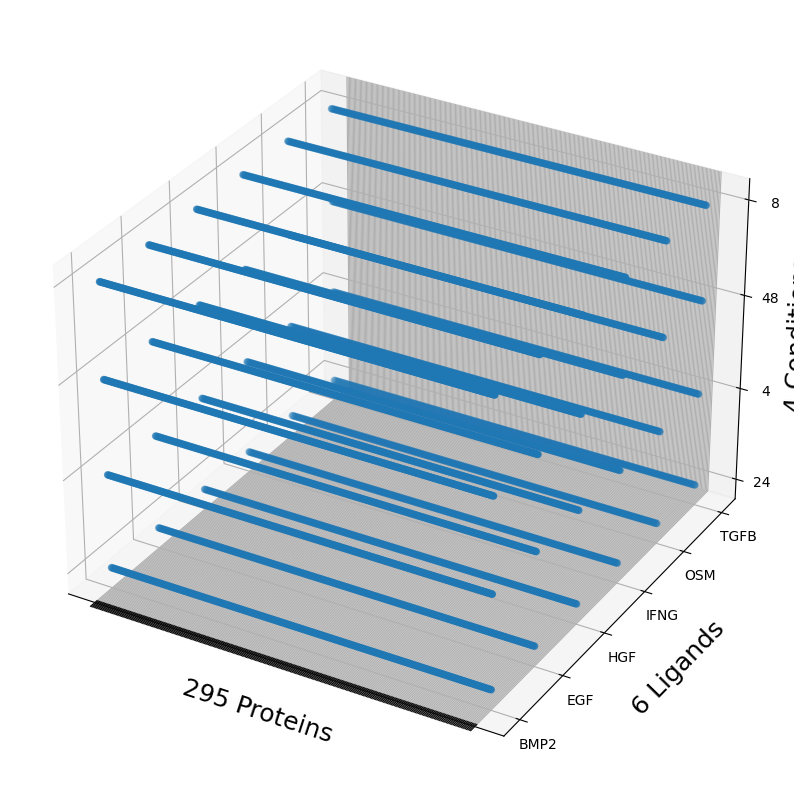

tensor size: (63, 6, 4)


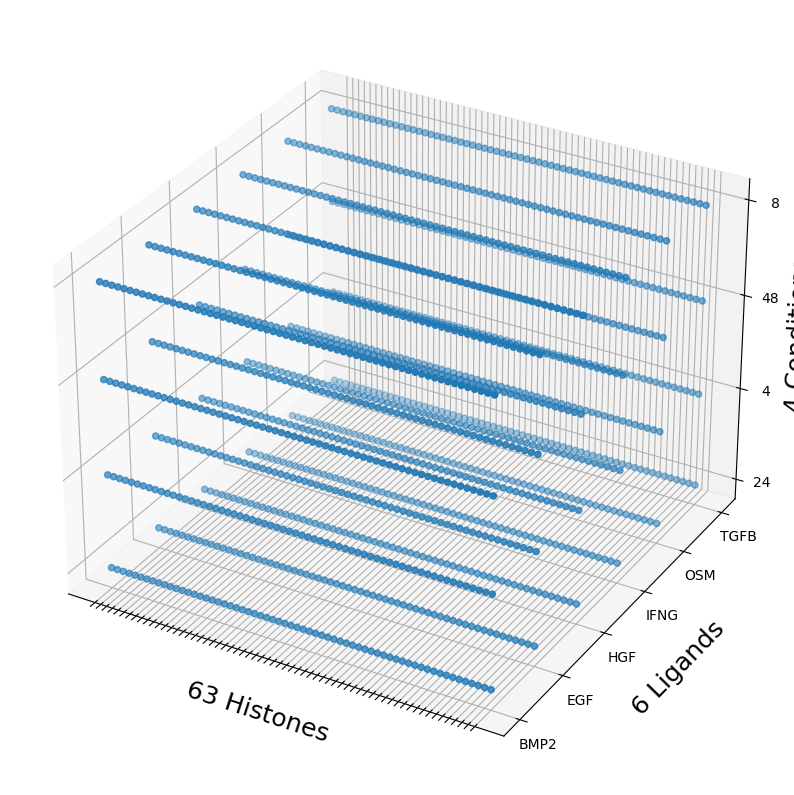

array([[[0.01603694, 0.00498128, 0.15020102, 0.11987436],
        [0.22310623, 0.00518862, 0.00451462, 0.08667783],
        [0.38609183, 0.02431607, 0.01223472, 0.00463541],
        [1.28004885, 0.05647008, 1.00454291, 0.15170223],
        [0.07312222, 0.24783035, 0.32408214, 0.09314978],
        [0.73523688, 0.0348537 , 0.0886167 , 0.27071722]],

       [[0.13363067, 0.13617883, 0.25985261, 0.16643383],
        [0.28110924, 0.10246243, 0.19855576, 0.11193881],
        [0.51355998, 0.07417823, 0.0328451 , 0.10798136],
        [1.37583075, 0.01695011, 1.06683495, 0.14408483],
        [0.06744267, 0.07217349, 0.38547037, 0.05503942],
        [0.63584072, 0.17820431, 0.07058933, 0.10703157]],

       [[0.25379935, 0.06700125, 0.41653408, 0.14575866],
        [0.27353731, 0.14247286, 0.03674173, 0.28082664],
        [0.0686377 , 0.06177913, 0.06135844, 0.21847132],
        [1.11076422, 0.17267652, 0.94383461, 0.28305081],
        [0.1520419 , 0.26863546, 0.61928438, 0.07883695],
        [0

In [8]:
hocmo.basicVisual(tensor, 'Proteins', 'Ligands', 'Conditions', protein_names,ligand_names,condition_names, './data/','test.png')
hocmo.basicVisual(tensor1, 'Histones', 'Ligands', 'Conditions', histone_names,ligand_names1,condition_names1, './data/','test1.png')

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:180: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(xs_average, ys_average, color="green", **linestyle, fmt='-')


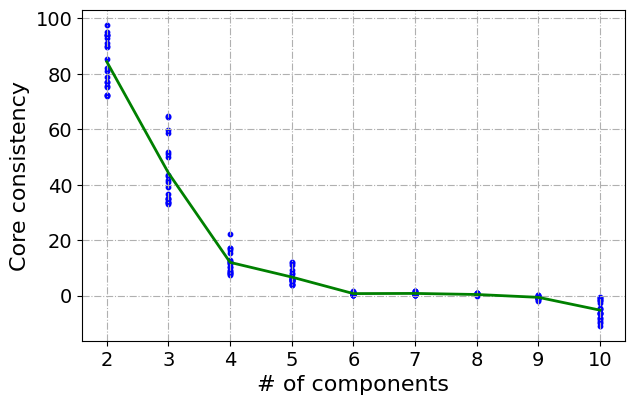

Number of K vs. Core consistency
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |====

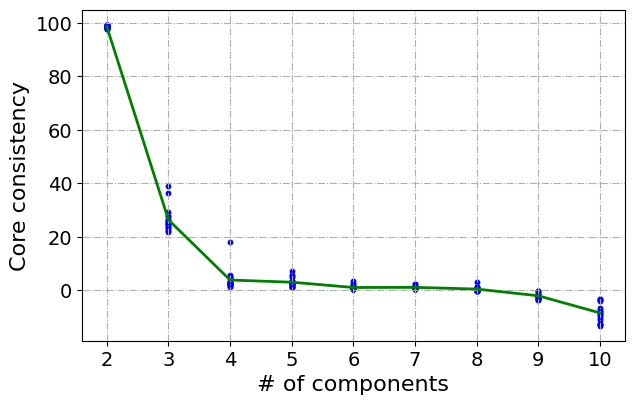

Number of K vs. Core consistency


In [9]:
components = hocmo.getCoreConsistency(tensor, "./data/core_consistency_rppa.png", iters = 100, num_k = 11, start =2, top_k=20)
components1 = hocmo.getCoreConsistency(tensor1, "./data/core_consistency_gcp.png", iters = 100, num_k = 11, start =2, top_k=20)


In [10]:
components = 2
A,B,C = hocmo.factorize(tensor, components, method="ncp")
A1,B1,C1 = hocmo.factorize(tensor1, components, method="ncp")

[A,B,C]: (295, 2) (6, 2) (4, 2)
[A,B,C]: (63, 2) (6, 2) (4, 2)


In [11]:
component_preds_A, component_preds_B, component_preds_C = hocmo.componentPredictionsForFactors(A,B,C)
component_preds_A1, component_preds_B1, component_preds_C1 = hocmo.componentPredictionsForFactors(A1,B1,C1)

295 inputs in total, each input belongs to a predicted component with the largest membership value:

 [1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1]
6 inputs in total, each input belongs to a predicted component with the largest membership value:

 [0 0 0 0 0 0]
6 inputs in total, each input belongs to a predicted component with the largest membership value:

 [0 0 0 0 0 0]
63 inputs in total, each input belongs to a predicted component with th

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:247: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(x_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:248: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(y_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:256: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:262: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(z_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:263: UserWarning: FixedFormatter should only be used together with FixedLocator


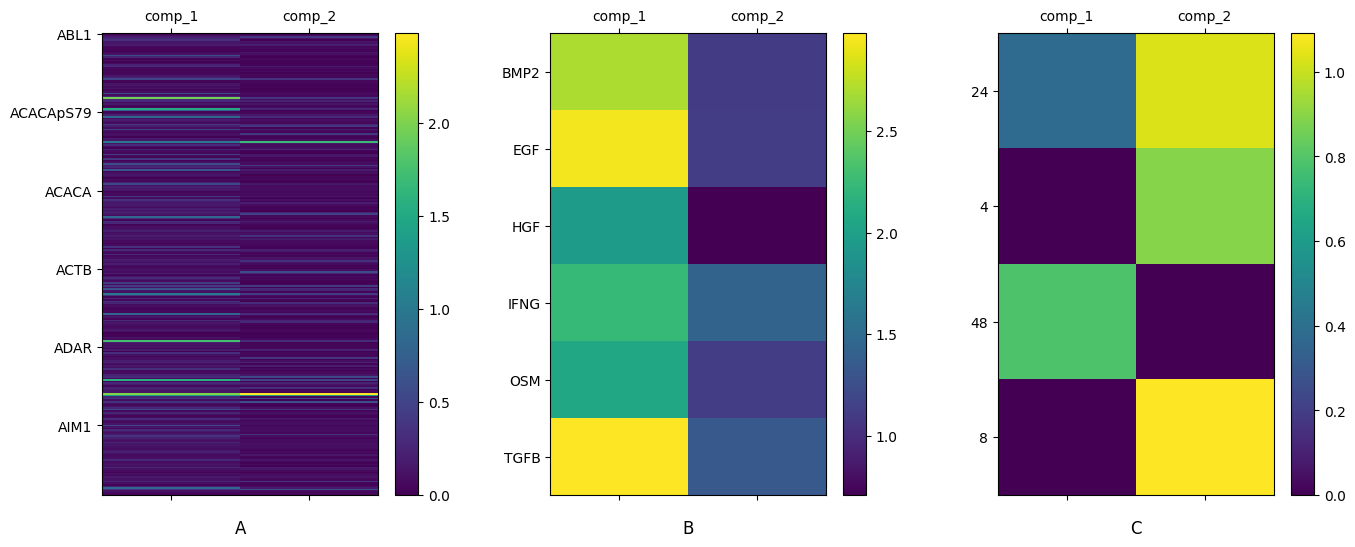

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:247: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(x_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:248: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(y_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:256: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:262: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(z_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:263: UserWarning: FixedFormatter should only be used together with FixedLocator


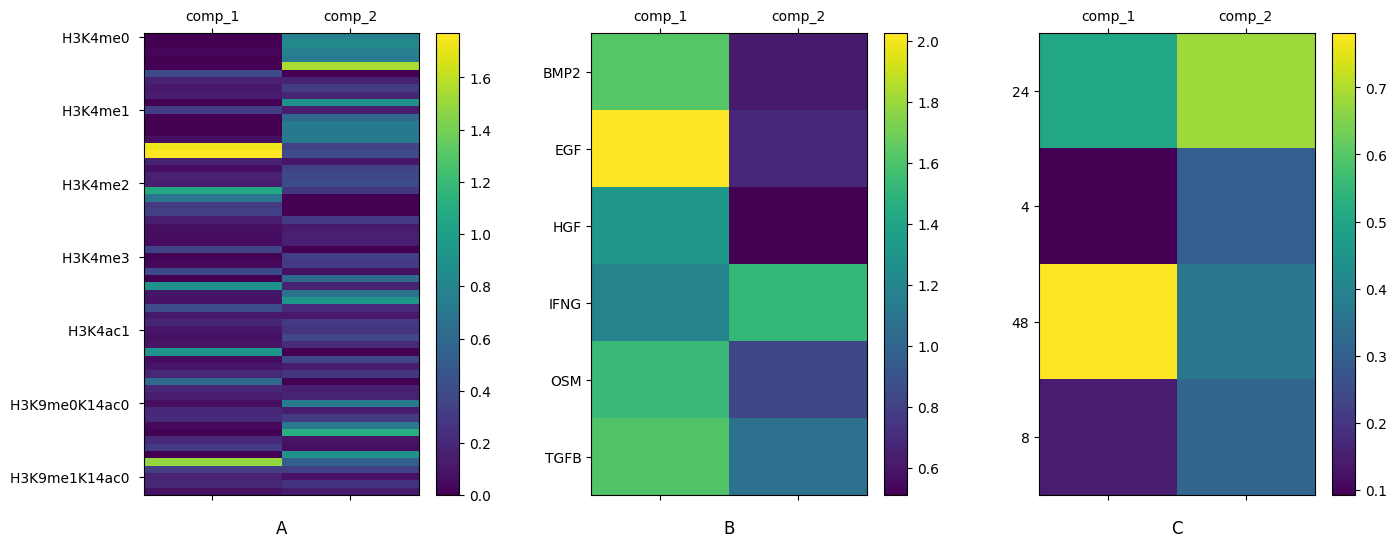

In [12]:
hocmo.plotFactorMatrices(A, B, C, components, './data/A_rppa.png', './data/B_rppa.png', './data/C_rppa.png', protein_names,ligand_names,condition_names)
hocmo.plotFactorMatrices(A1, B1, C1, components, './data/A_gcp.png', './data/B_gcp.png', './data/C_gcp.png', histone_names,ligand_names1,condition_names1)

['0~214', '215~294']
(6, 295, 4)
['0~21', '22~62']
(6, 63, 4)


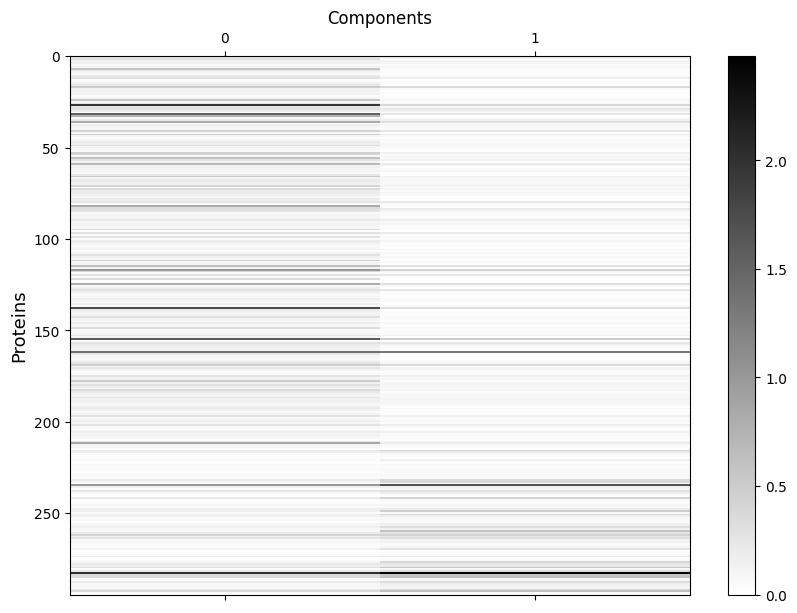

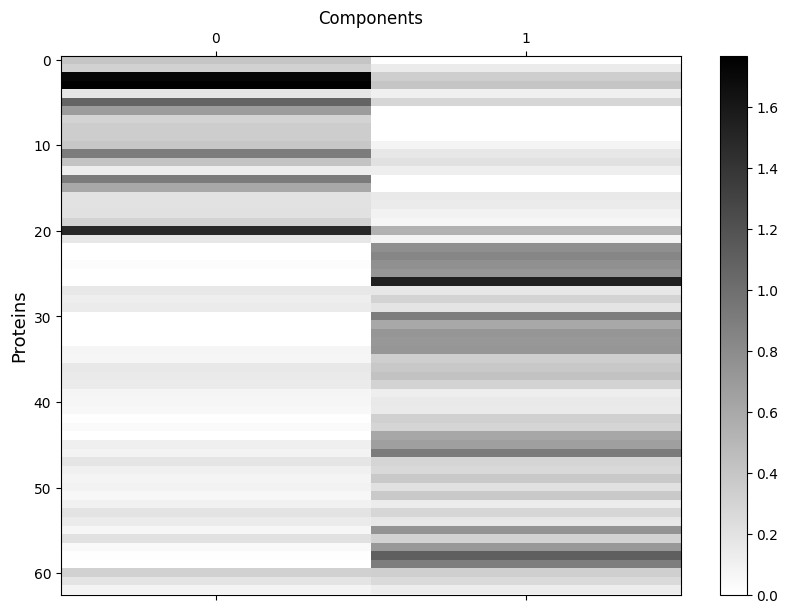

In [13]:
tensor_binary, A_ranked, A_names_ranked, A_clusters = hocmo.getClusterMembershipProbabilityA(A, 6,4, components, component_preds_A,  incidence_matrix_binary, incidence_matrix,
                                                        'Proteins', 'RPPA', "./data/A_ranked_per_cluster.png", )

tensor_binary1, A_ranked1, A_names_ranked1, A_clusters1 = hocmo.getClusterMembershipProbabilityA(A1, 6,4, components, component_preds_A1,  incidence_matrix_binary1, incidence_matrix1,
                                                        'Proteins', 'GCP', "./data/A_ranked_per_cluster.png", )


['0~5', '6~5']
['0~4', '5~5']


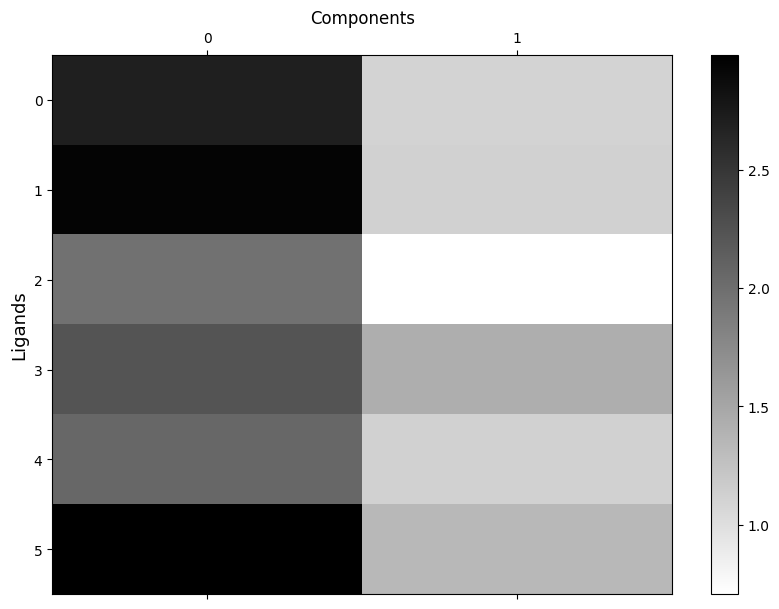

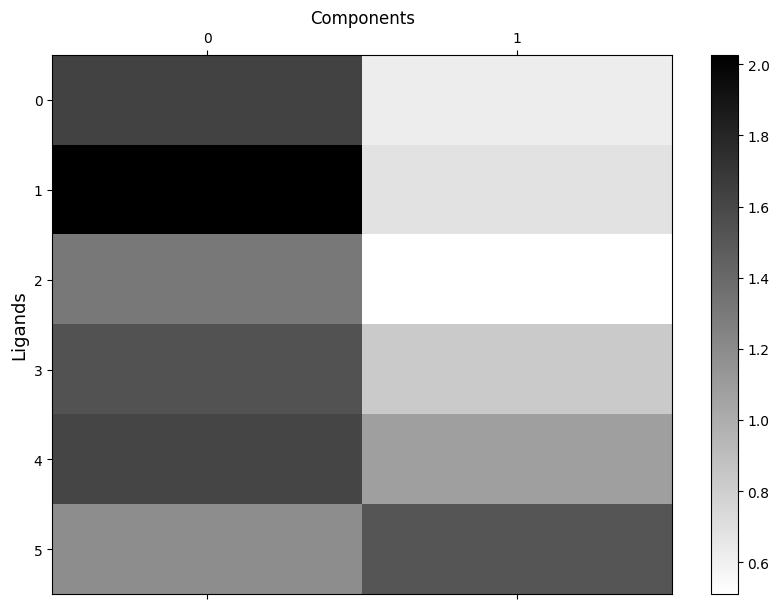

In [14]:
B_ranked, B_names_ranked, B_clusters = hocmo.getClusterMembershipProbability(B, components, component_preds_B, ligand_names, 'Ligands','Components', "./data/B_ranked_per_cluster.png")

B_ranked1, B_names_ranked1, B_clusters1 = hocmo.getClusterMembershipProbability(B1, components, component_preds_B1, ligand_names1, 'Ligands','Components', "./data/B1_ranked_per_cluster.png")


['0~0', '1~3']
['0~0', '1~3']


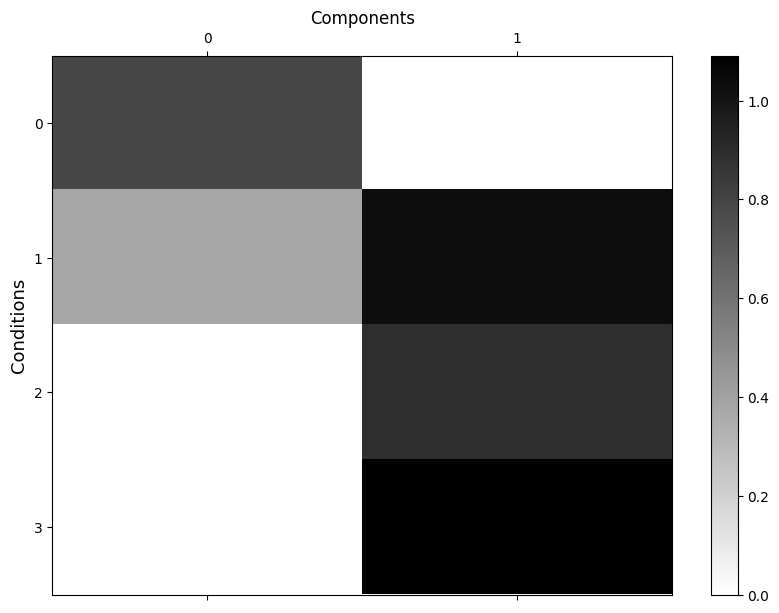

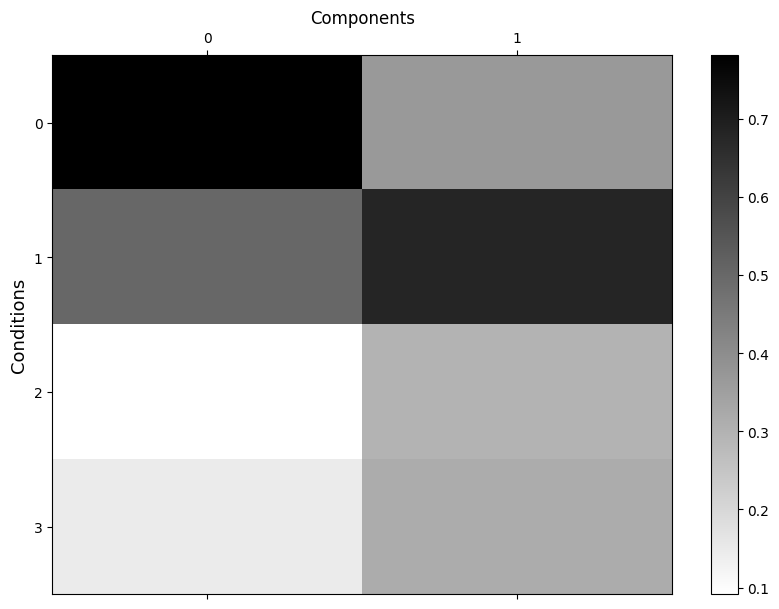

In [15]:
C_ranked, C_names_ranked, C_clusters = hocmo.getClusterMembershipProbability(C, components, component_preds_C, condition_names, 'Conditions','Components', "./data/C_ranked_per_cluster.png")

C_ranked1, C_names_ranked1, C_clusters1 = hocmo.getClusterMembershipProbability(C1, components, component_preds_C1, condition_names1, 'Conditions','Components', "./data/C_ranked_per_cluster1.png")


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:439: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(show_protein_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:444: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, fontsize=12) ##number of components
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:454: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(B_names_ranked.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:455: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels, fontsize=12)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:462: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(C_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:463: UserWarn

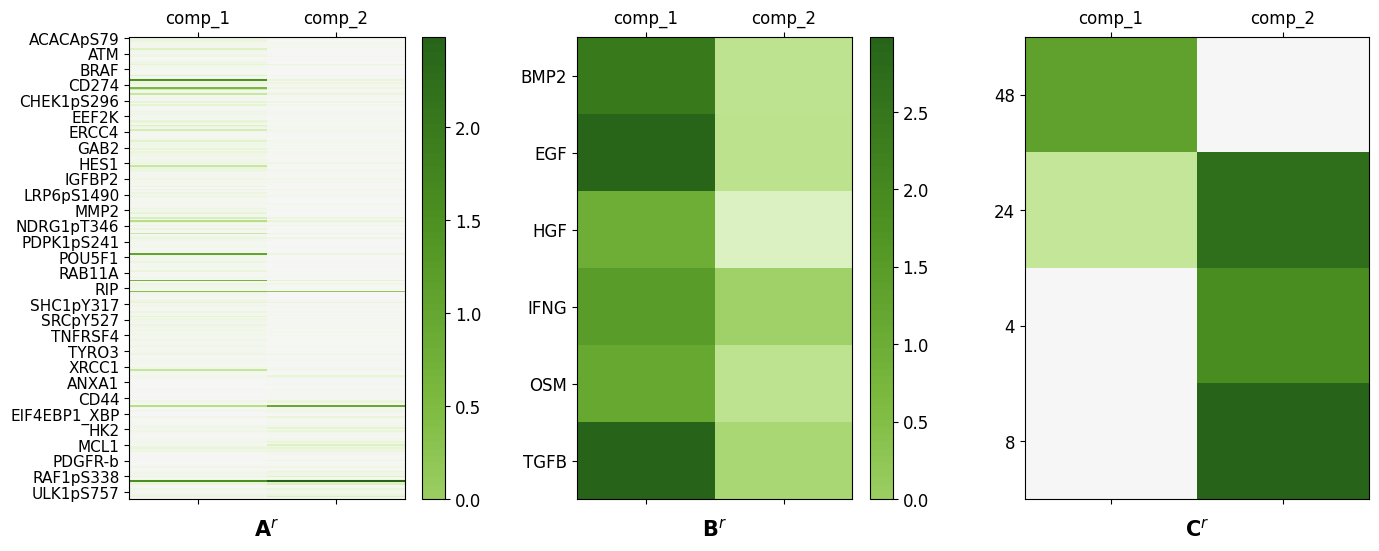

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:439: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(show_protein_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:444: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, fontsize=12) ##number of components
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:454: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(B_names_ranked.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:455: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels, fontsize=12)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:462: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(C_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:463: UserWarn

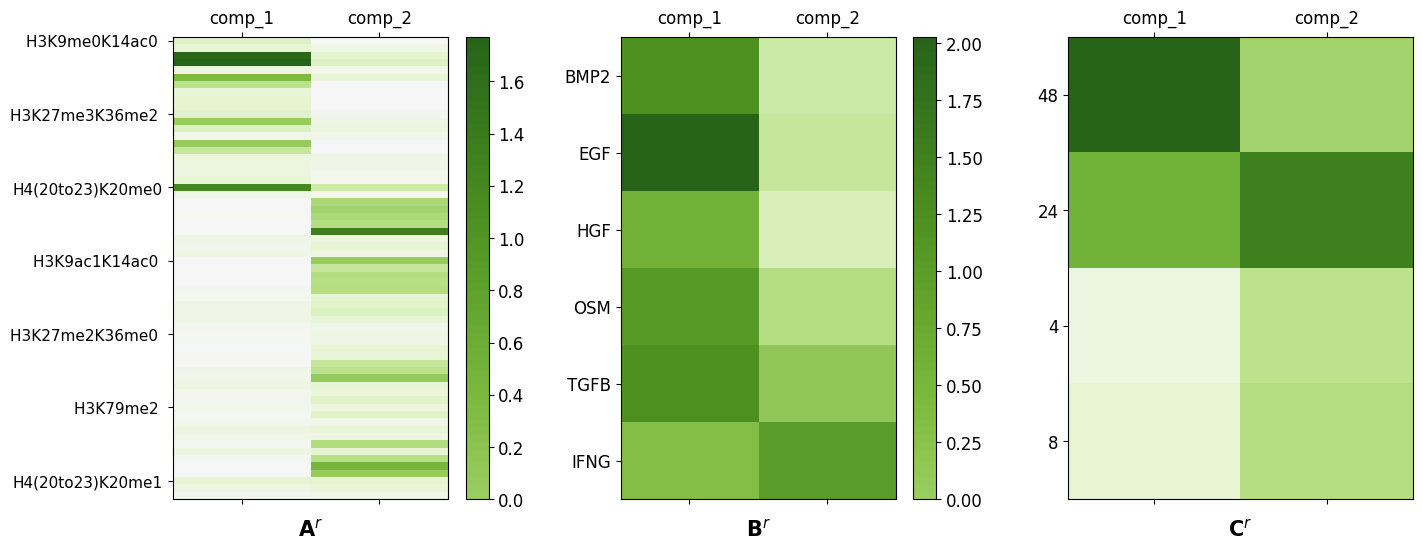

In [16]:
hocmo.plotLatentFactor(A_ranked, B_ranked, C_ranked, components, A_names_ranked, B_names_ranked, C_names_ranked, './data/')
hocmo.plotLatentFactor(A_ranked1, B_ranked1, C_ranked1, components, A_names_ranked1, B_names_ranked1, C_names_ranked1, './data/')

In [17]:
C_ranked

array([[0.78615366, 0.        ],
       [0.38125732, 1.03269853],
       [0.        , 0.8949914 ],
       [0.        , 1.09140314]])

In [18]:
hocmo.saveFactorsToExcel(A_ranked, B_ranked, C_ranked, components, A_names_ranked, B_names_ranked, C_names_ranked, './data/', "latentFactors_gcp.xlsx")
hocmo.saveFactorsToExcel(A_ranked1, B_ranked1, C_ranked1, components, A_names_ranked1, B_names_ranked1, C_names_ranked1, './data/', "latentFactors.xlsx")

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:495: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:495: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


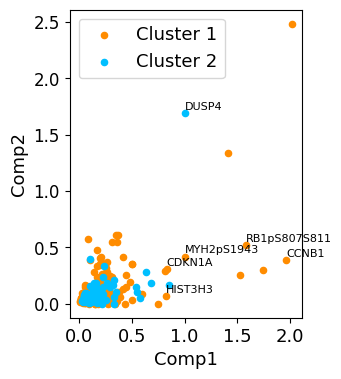

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1014: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(show_y_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1018: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels,fontsize=12)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1020: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(show_y_names_sig, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1024: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels,fontsize=12)


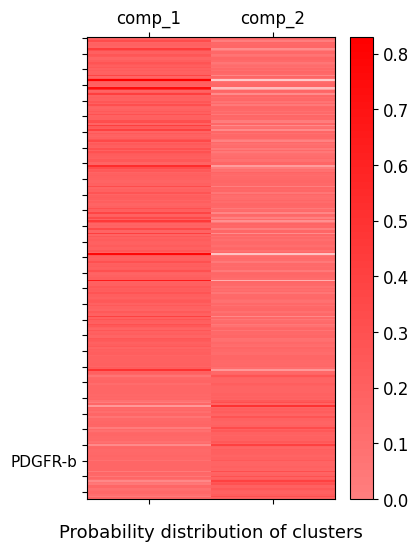

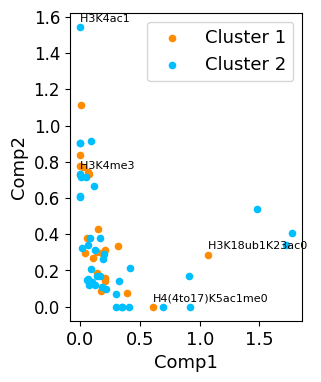

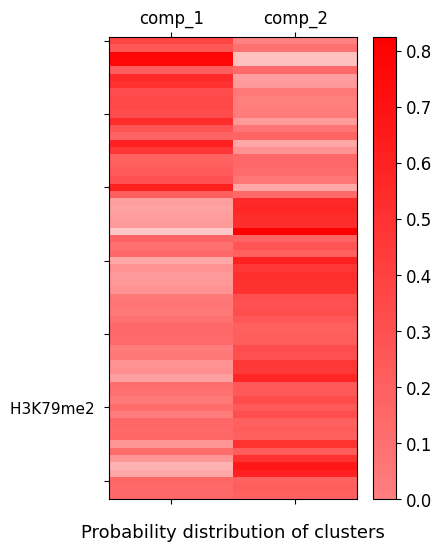

In [19]:
hocmo.plotForFactorMatrix(A_ranked, A_clusters, A_names_ranked, components,"proteins_per_cluster_scatter_plot.png", './data/' ,"proteins_per_cluster_probability.png")
hocmo.plotForFactorMatrix(A_ranked1, A_clusters1, A_names_ranked1, components,"proteins_per_cluster_scatter_plot.png", './data/' ,"proteins_per_cluster_probability_gcp.png")

(295, 6)


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1069: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1074: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


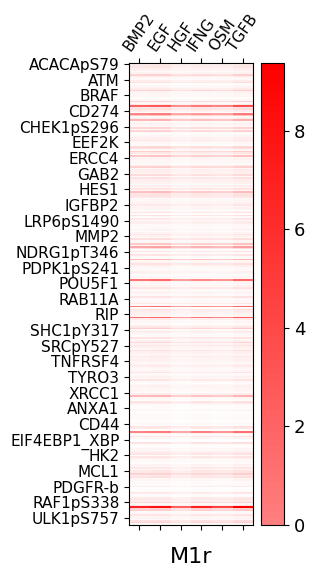

mean:0.6493460797209983, std:0.866440245611347


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


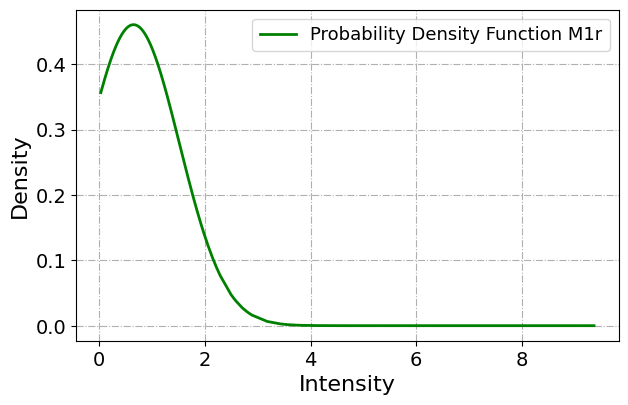

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore


(295, 4)


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1069: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1074: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


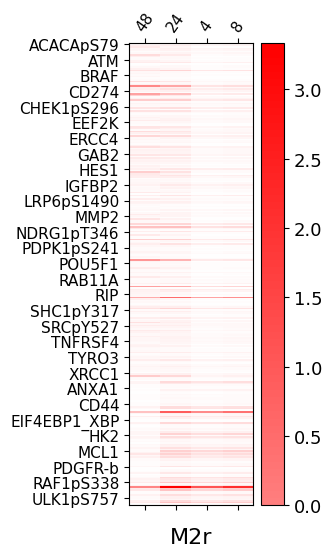

mean:0.1530678986524729, std:0.24023138061549618


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


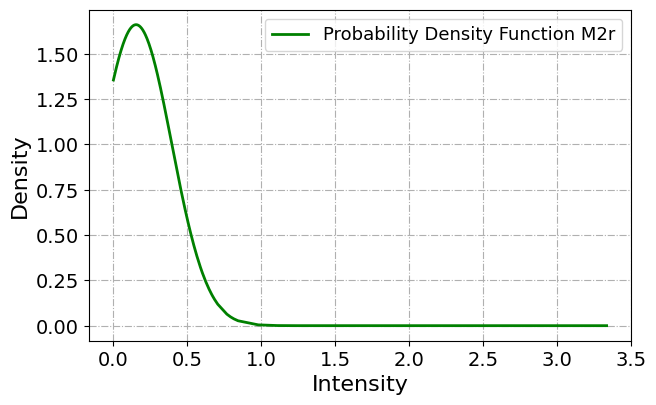

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore


(6, 4)


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1069: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1074: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


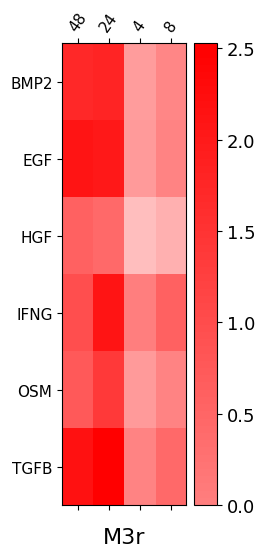

mean:1.5826027250990595, std:0.5440604884499749


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


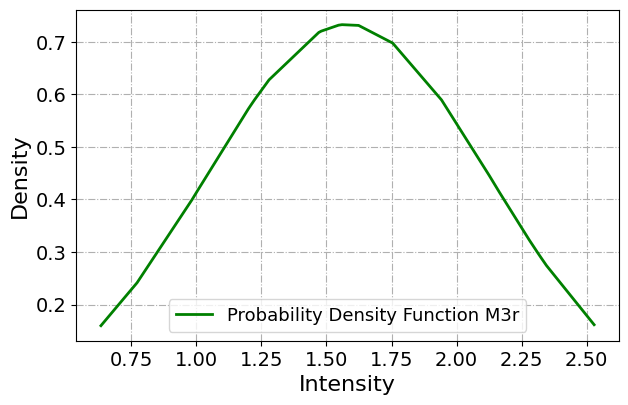

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore


(63, 6)


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1069: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1074: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


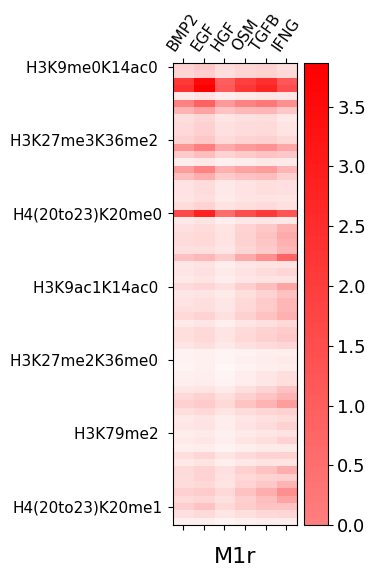

mean:0.7280712243297787, std:0.619967193989847


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


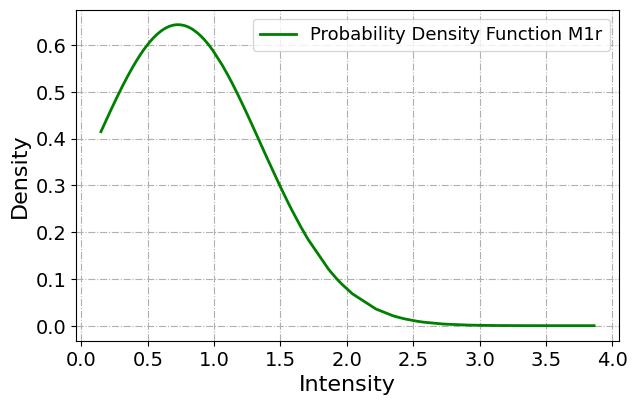

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore


(63, 4)


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1069: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1074: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


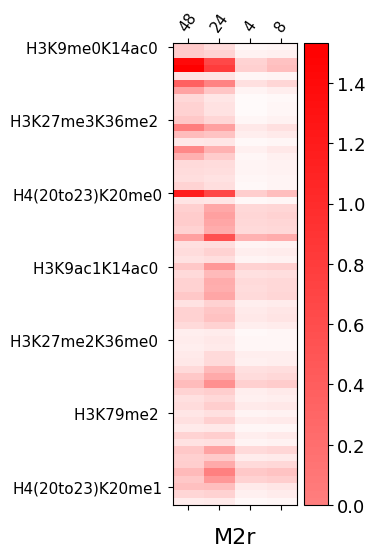

mean:0.25305138649442044, std:0.23196334682257608


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


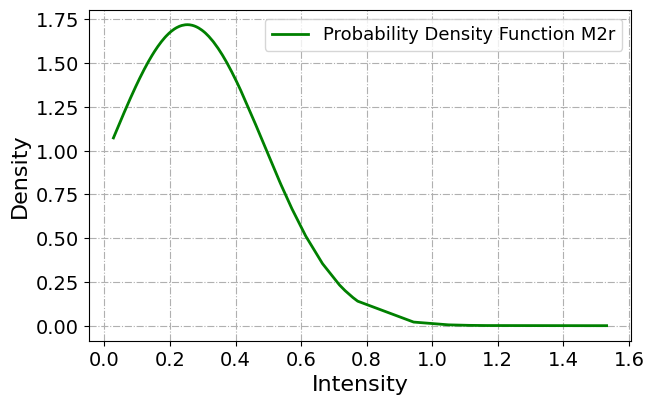

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1069: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1074: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


(6, 4)


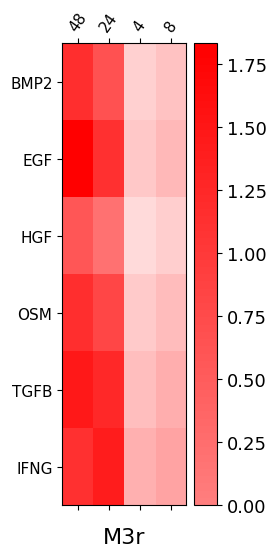

mean:0.9525562339675938, std:0.5275029837387077


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


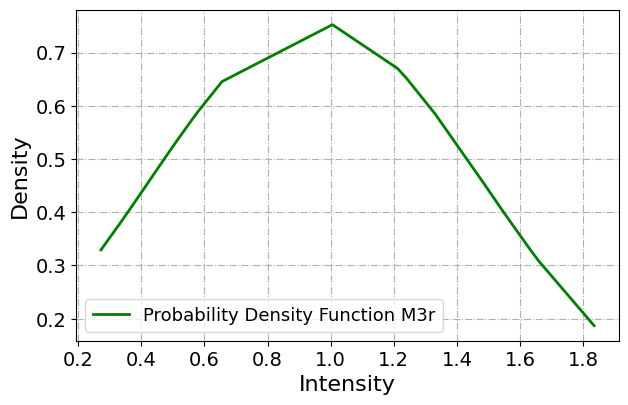

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore


In [20]:
patterns_list, means_list, std_list = hocmo.getCorrelationsForAllFactors(A_ranked, B_ranked, C_ranked, A_names_ranked, B_names_ranked, C_names_ranked,'./data/', "Intensity_density_ncp_rppa.xlsx", './data/', [ "M1r", "M2r", "M3r"],
                                        ['Probability Density Function M1r', 'Probability Density Function M2r','Probability Density Function M3r'])
patterns_list1, means_list1, std_list1 = hocmo.getCorrelationsForAllFactors(A_ranked1, B_ranked1, C_ranked1, A_names_ranked1, B_names_ranked1, C_names_ranked1,'./data/', "Intensity_density_ncp_gcp.xlsx", './data/', [ "M1r", "M2r", "M3r"],
                                        ['Probability Density Function M1r', 'Probability Density Function M2r','Probability Density Function M3r'])

In [21]:
patterns_AB = patterns_list[0]
patterns_AC = patterns_list[1]
patterns_BC = patterns_list[2]
mean_AB = means_list[0]
mean_AC = means_list[1]
mean_BC = means_list[2]
std_AB = std_list[0]
std_AC = std_list[1]
std_BC = std_list[2]

patterns_AB1 = patterns_list1[0]
patterns_AC1 = patterns_list1[1]
patterns_BC1 = patterns_list1[2]
mean_AB1 = means_list1[0]
mean_AC1 = means_list1[1]
mean_BC1 = means_list1[2]
std_AB1 = std_list1[0]
std_AC1 = std_list1[1]
std_BC1 = std_list1[2]

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


<Figure size 1600x1000 with 0 Axes>

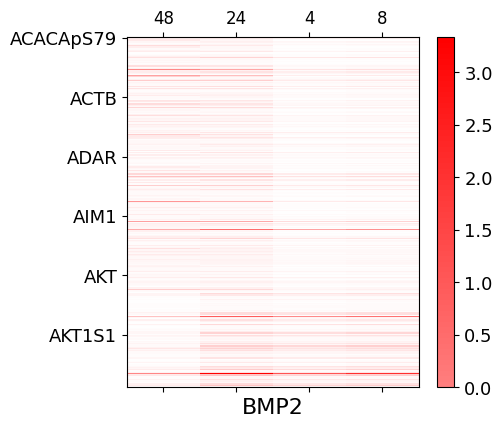

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


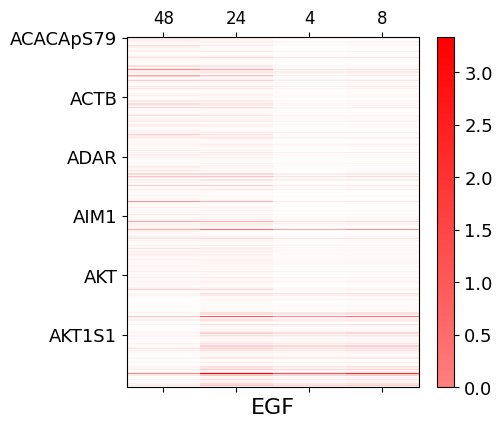

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


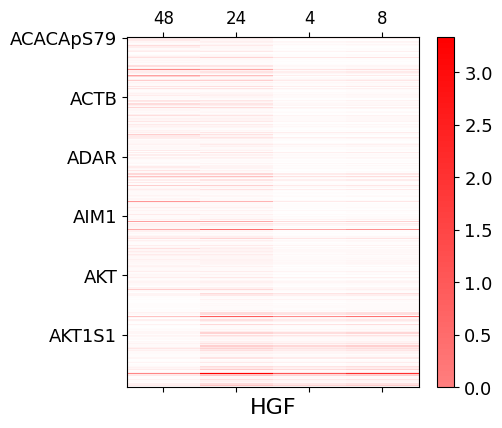

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


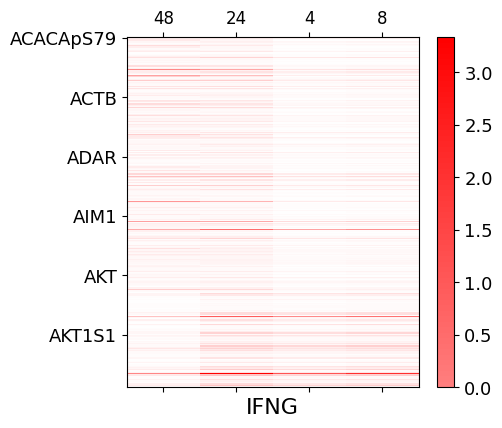

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


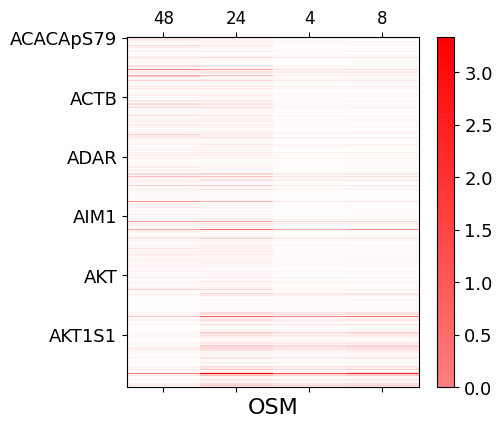

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


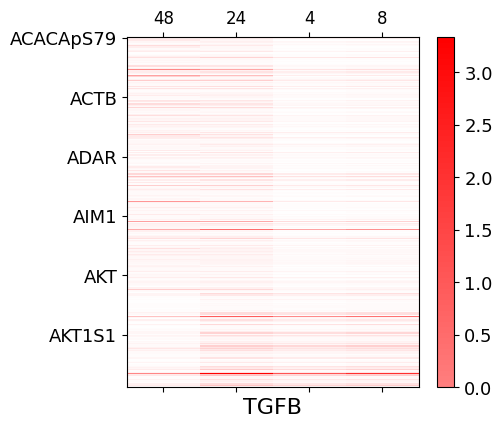

BMP2, mean:0.1530678986524729, std:0.24023138061549618


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


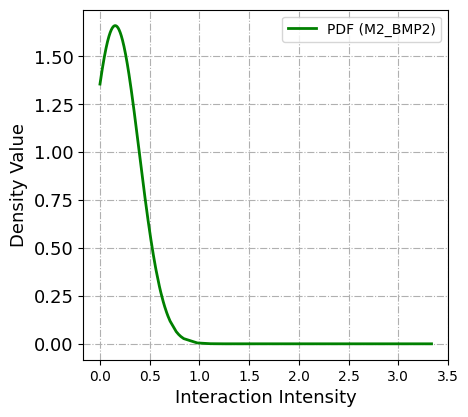

EGF, mean:0.1530678986524729, std:0.24023138061549618


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


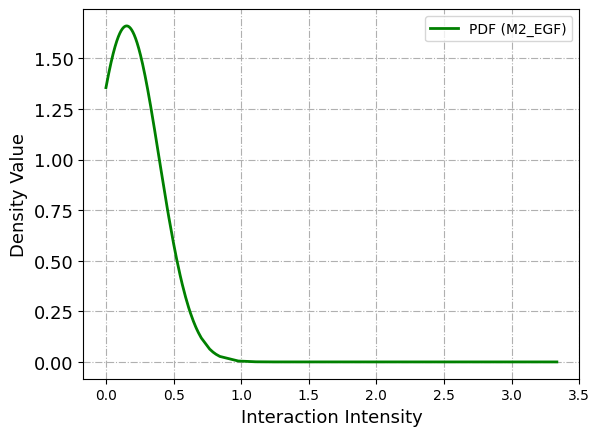

HGF, mean:0.1530678986524729, std:0.24023138061549618


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


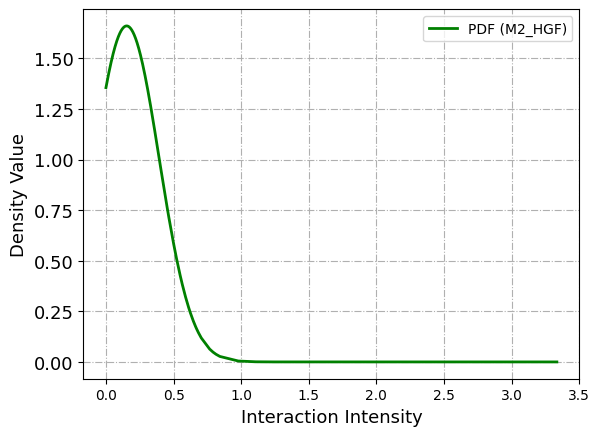

IFNG, mean:0.1530678986524729, std:0.24023138061549618


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


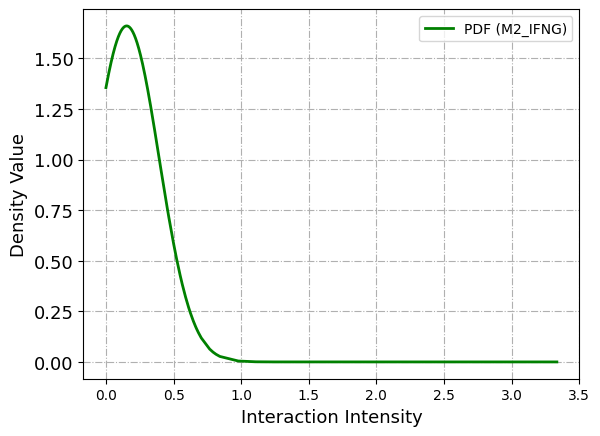

OSM, mean:0.1530678986524729, std:0.24023138061549618


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


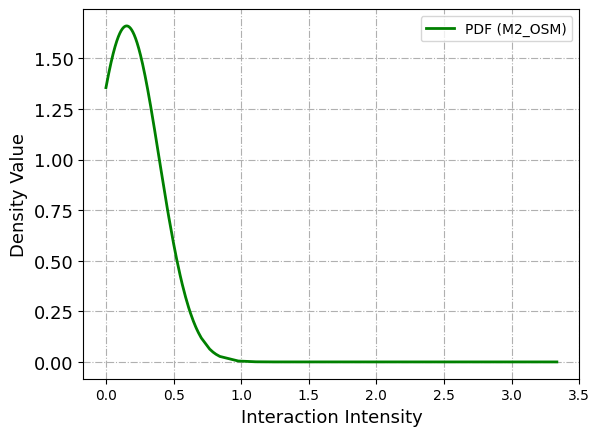

TGFB, mean:0.1530678986524729, std:0.24023138061549618


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


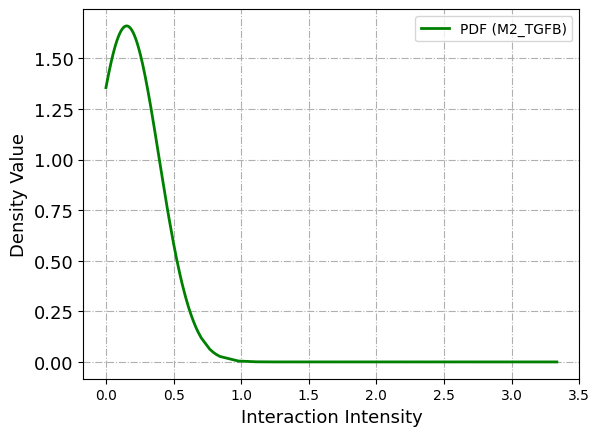

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


<Figure size 1600x1000 with 0 Axes>

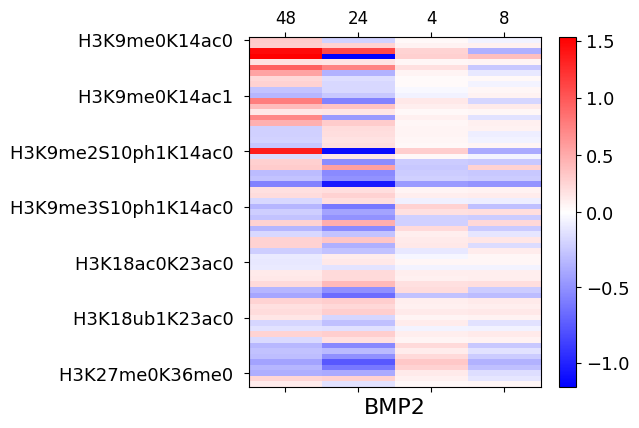

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


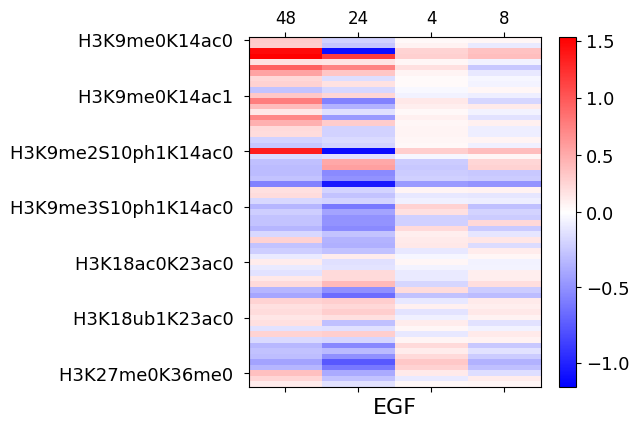

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


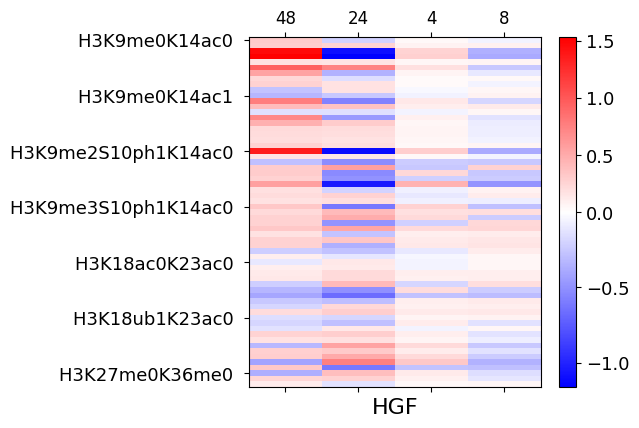

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


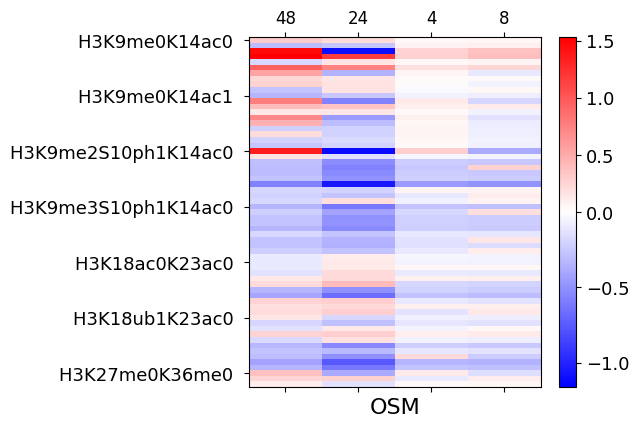

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


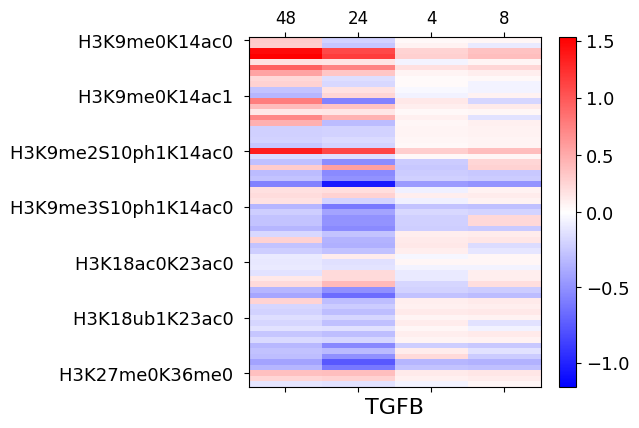

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:625: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


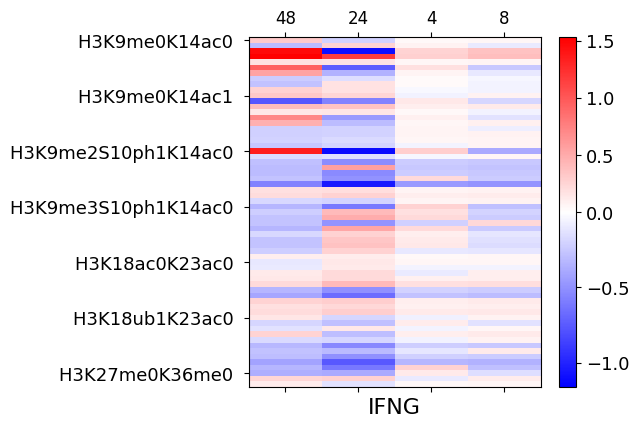

BMP2, mean:-0.0029950400719793643, std:0.343268157874928


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


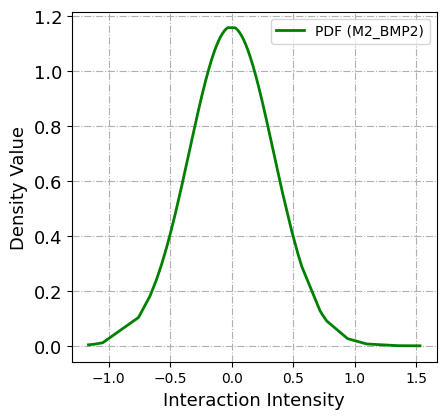

EGF, mean:-0.02346317241742688, std:0.34247843438089554


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


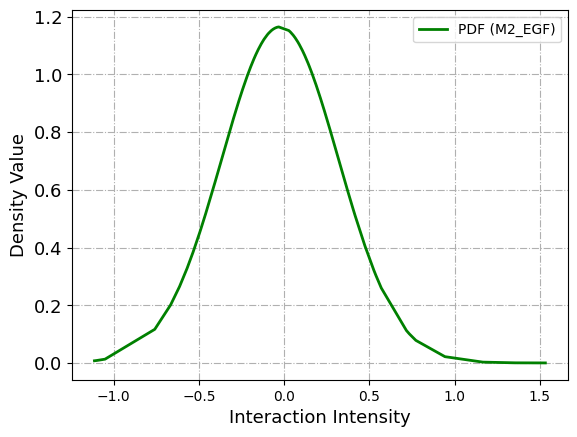

HGF, mean:0.04497670471906909, std:0.34032204528724397


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


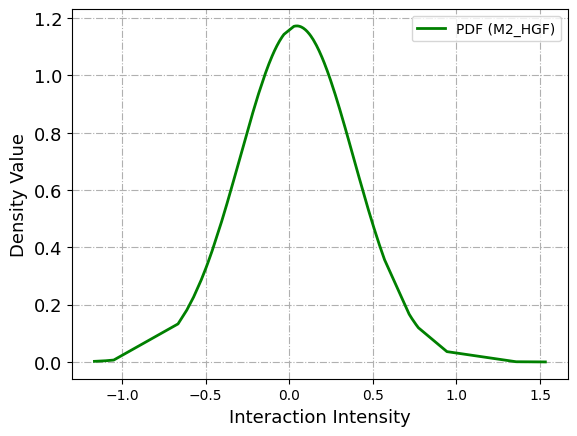

OSM, mean:-0.062317472002956405, std:0.33757744468349776


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


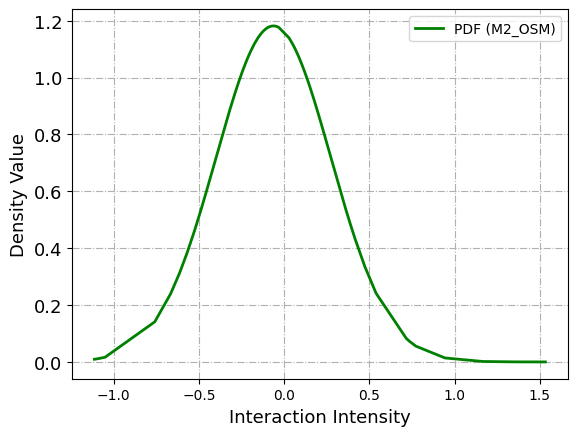

TGFB, mean:-0.015967482135726584, std:0.34290966447466087


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


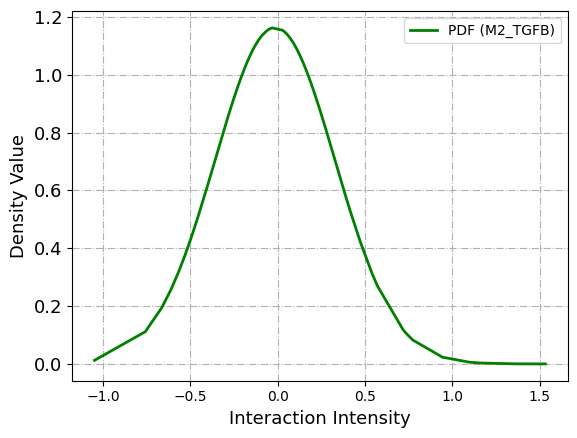

IFNG, mean:-0.028043101172818507, std:0.3421338670060161


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:643: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


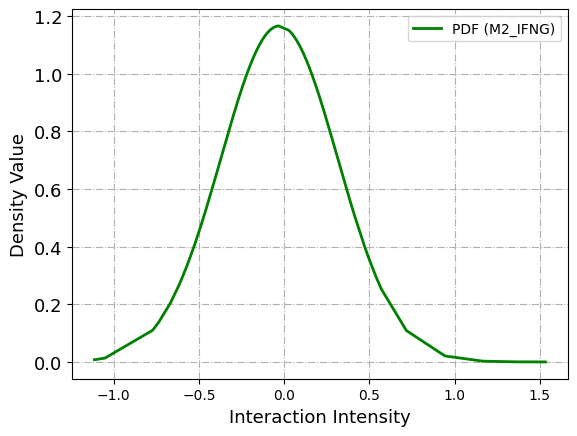

In [22]:
hocmo.plotCorrelationsPerEntity(patterns_AC, tensor_binary, A_names_ranked, B_names_ranked, C_names_ranked, "./data/", "./data/")

hocmo.plotCorrelationsPerEntity(patterns_AC1, tensor_binary1, A_names_ranked1, B_names_ranked1, C_names_ranked1, "./data/", "./data/")


In [23]:
patterns_AB_pairs, patterns_AC_pairs, patterns_BC_pairs = hocmo.writeCorrelationsToExcel(patterns_list, ["M1_AB", "M2_AC", "M3_BC"], './data/correlations.xlsx', A_names_ranked, B_names_ranked, C_names_ranked)

patterns_AB_pairs1, patterns_AC_pairs1, patterns_BC_pairs1 = hocmo.writeCorrelationsToExcel(patterns_list1, ["M1_AB", "M2_AC", "M3_BC"], './data/correlations_gcp.xlsx', A_names_ranked1, B_names_ranked1, C_names_ranked1)

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:677: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [24]:
'''

'''

M1_cutoff_ce = 2.890480549 - mean_AB
M2_cutoff_ce = 0.70486722 - mean_AC
M3_cutoff_ce= 2.31192068 - mean_BC

M1_cutoff_ce1 = 1.493671157 - mean_AB1
M2_cutoff_ce1 = 0.478510333 - mean_AC1
M3_cutoff_ce1 = 1.473261366 - mean_BC1


cutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]
cutoffs_center_elbow_list1 = [M1_cutoff_ce1, M2_cutoff_ce1, M3_cutoff_ce1]


M1_cutoff_e = 2.890480549 - mean_AB
M2_cutoff_e = 0.70486722 - mean_BC
M3_cutoff_e= 2.31192068 - mean_BC

M1_cutoff_e1 = 2.042120144 - mean_AB1
M2_cutoff_e1 = 0.71890227 - mean_AC1
M3_cutoff_e1 = 1.547860473 - mean_BC1


cutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]
cutoffs_elbow_list1 = [M1_cutoff_e1, M2_cutoff_e1, M3_cutoff_e1]


M1_cutoff_asymptotic = 4.137811156 - mean_AB
M2_cutoff_asymptotic = 1.110098385 - mean_AC
M3_cutoff_asymptotic=  2.342765763 - mean_BC

M1_cutoff_asymptotic1 = 2.974741259 - mean_AB1
M2_cutoff_asymptotic1 = 1.072320865 - mean_AC1
M3_cutoff_asymptotic1 = 1.659471139 - mean_BC1

cutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]
cutoffs_asymptotic_list1 = [M1_cutoff_asymptotic1, M2_cutoff_asymptotic1, M3_cutoff_asymptotic1]


'''
M1_cutoff_ce = 0
M2_cutoff_ce = 0
M3_cutoff_ce= 0
cutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]
M1_cutoff_e = 0
M2_cutoff_e = 0
M3_cutoff_e= 0
cutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]
M1_cutoff_asymptotic = 0
M2_cutoff_asymptotic = 0
M3_cutoff_asymptotic=  0
cutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]
'''


##Reetika to proide info

'\nM1_cutoff_ce = 0\nM2_cutoff_ce = 0\nM3_cutoff_ce= 0\ncutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]\nM1_cutoff_e = 0\nM2_cutoff_e = 0\nM3_cutoff_e= 0\ncutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]\nM1_cutoff_asymptotic = 0\nM2_cutoff_asymptotic = 0\nM3_cutoff_asymptotic=  0\ncutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]\n'

In [25]:
hocmo.getSignificantEntities([patterns_AB_pairs, patterns_AC_pairs, patterns_BC_pairs], cutoffs_elbow_list, cutoffs_center_elbow_list, cutoffs_asymptotic_list, [mean_AB, mean_AC, mean_BC], ["M1_Elbow", "M2_Elbow", "M3_Elbow"], ["M1_Center_Elbow", "M2_Center_Elbow", "M3_Center_Elbow"], ["M1_Asymptotic", "M2_Asymptotic", "M3_Asymptotic"], './data/SignificantEntities.xlsx')
hocmo.getSignificantEntities([patterns_AB_pairs1, patterns_AC_pairs1, patterns_BC_pairs1], cutoffs_elbow_list1, cutoffs_center_elbow_list1, cutoffs_asymptotic_list1, [mean_AB1, mean_AC1, mean_BC1], ["M1_Elbow", "M2_Elbow", "M3_Elbow"], ["M1_Center_Elbow", "M2_Center_Elbow", "M3_Center_Elbow"], ["M1_Asymptotic", "M2_Asymptotic", "M3_Asymptotic"], './data/SignificantEntities_gcp.xlsx')


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the publi

(295, 63)


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:716: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(show_protein_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:722: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(show_2_names, fontsize=11, rotation=90)


mean:2.8805013967276047, std:5.3589640194098225


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:744: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(patterns_1_2_, fitted_pdf, color="green", **linestyle, fmt='-')


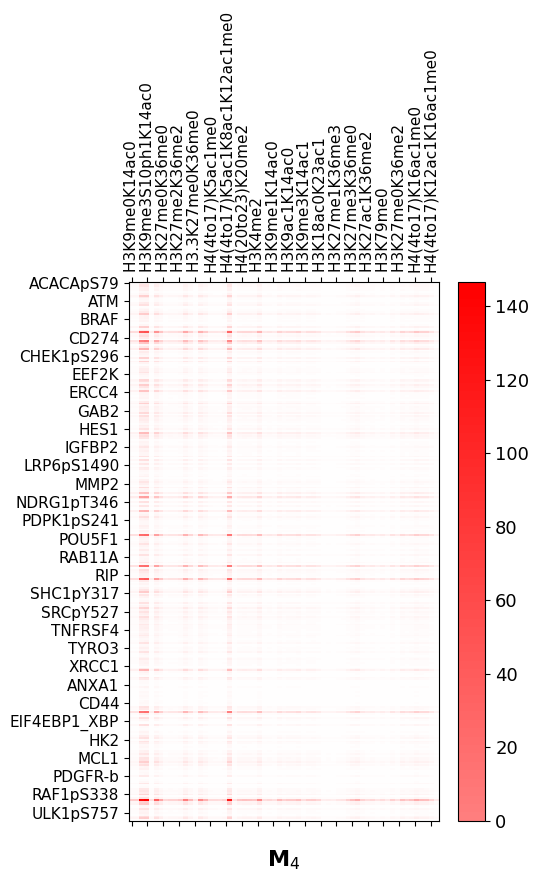

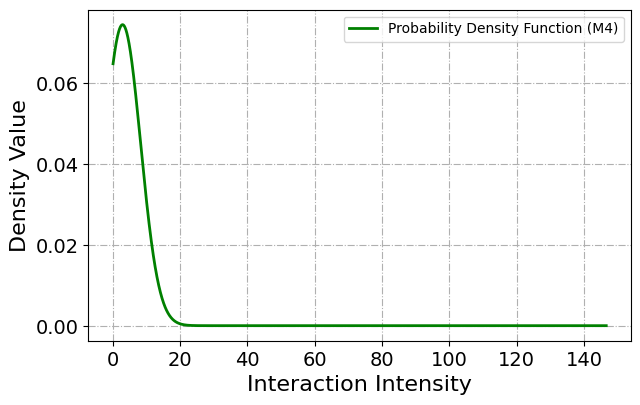

In [26]:
patterns_rppa_gcp = hocmo.crossVisualize(patterns_AB1, patterns_AB, A_names_ranked, A_names_ranked1, "data/M4_with_Intensity_dist_ncp.xlsx")


In [27]:
total_hoc_score = hocmo.getAllHOCScores(patterns_AB, patterns_rppa_gcp, A_names_ranked, A_names_ranked1, B_names_ranked,"data/HOC_scores.xlsx")
total_hoc_score

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:781: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_hoc_score.save()


,Triplet,HOC Score
1168,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , TGFB>",1373.487894
873,"<RPS6pS235S236, H3K9me2S10ph1K14ac0 , TGFB>",1315.461941
1168,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , EGF>",1278.982073
6183,"<RPS6pS235S236, H4(20to23)K20me0, TGFB>",1230.069327
873,"<RPS6pS235S236, H3K9me2S10ph1K14ac0 , EGF>",1224.948721
...,...,...
15611,"<PIK3CA, H3K27me0K36me3 , HGF>",0.002064
18561,"<PIK3CA, H4(68-78)AltNorm, HGF>",0.001815
12071,"<PIK3CA, H3K27me2K36me0 , HGF>",0.001789
11776,"<PIK3CA, H3K27me1K36me3 , HGF>",0.001625


In [28]:
sig_ligands = B_names_ranked
sig_proteins = ['CCNB1','PLK1','RB1pS807S811','RPS6pS240S244','DUSP4','RPS6pS235S236',
                'CDC2','MYH2pS1943']
sig_histones = ['H3K9me2S10ph1K14ac0 ','H3K9me3S10ph1K14ac0 ','H3K18ub1K23ac0 ']

total_hoc_score = hocmo.getFilteredHOCScores(patterns_AB, patterns_rppa_gcp, A_names_ranked, A_names_ranked1, B_names_ranked,sig_proteins, sig_histones, "data/filtered_HOC_scores.xlsx")
total_hoc_score

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:814: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_hoc_score.save()


,Triplet,HOC Score
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , EGF>",1.000000
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , BMP2>",1.000000
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , HGF>",1.000000
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , IFNG>",1.000000
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , OSM>",1.000000
...,...,...
23,"<MYH2pS1943, H3K18ub1K23ac0 , EGF>",0.091562
23,"<MYH2pS1943, H3K18ub1K23ac0 , BMP2>",0.090475
23,"<MYH2pS1943, H3K18ub1K23ac0 , TGFB>",0.088657
23,"<MYH2pS1943, H3K18ub1K23ac0 , OSM>",0.085377


In [29]:
tensor_T = np.transpose(tensor,[1,2,0])